In [1]:
import numpy as np
import pandas as pd
from deap import algorithms
import multiprocessing

from preprocessing import preprocess_data
from ga_setup import setup_ga
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, simulate_best_possible_strategy

In [2]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_ao,momentum_roc,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,others_dr
100,0.010527,0.031441,0.851364,0.624558,0.826936,0.917721,0.323555,0.103410,0.517615,0.437511,...,0.509427,0.490347,0.500803,0.657449,0.722794,0.674967,0.379144,0.512771,0.260686,0.684075
101,0.002279,0.019927,0.751935,0.530293,0.752476,0.885183,0.240457,0.103784,0.438157,0.314479,...,0.358861,0.000000,0.373029,0.656395,0.627237,0.629350,0.351974,0.496543,0.232126,0.458212
102,0.000000,0.000000,0.679218,0.419615,0.768138,0.861612,0.127972,0.095694,0.329905,0.314479,...,0.329090,0.074605,0.186604,0.650855,0.550415,0.564764,0.403653,0.497833,0.326124,0.507809
103,0.003144,0.015671,0.632797,0.479370,0.821784,0.865538,0.149417,0.089844,0.400408,0.336827,...,0.365943,0.132242,0.066984,0.647970,0.563763,0.536547,0.408170,0.500112,0.331433,0.728995
104,0.005926,0.030882,0.613277,0.517987,0.823636,0.864841,0.159557,0.084945,0.415658,0.347800,...,0.440715,0.160540,0.120610,0.637317,0.523617,0.528576,0.408150,0.501930,0.328958,0.706859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.983454,0.953462,0.783798,0.886169,0.871783,0.991989,0.831718,0.374975,0.649625,0.412539,...,0.744902,0.986843,0.976404,0.954429,0.921568,0.723119,0.650704,0.754736,0.439126,0.825358
2279,0.987046,0.941974,0.820142,0.852654,0.829428,0.982671,0.830068,0.385582,0.666461,0.410112,...,0.821579,0.958832,0.981853,0.974622,0.931230,0.725604,0.633581,0.767887,0.389767,0.681307
2280,0.987406,0.929497,0.779111,0.816049,0.819299,0.980124,0.823311,0.396090,0.582716,0.410112,...,0.768139,0.918568,0.954652,0.992701,0.931895,0.710479,0.628860,0.777104,0.368658,0.668755
2281,0.996324,0.946255,0.837785,0.812151,0.817958,0.979381,0.834400,0.407369,0.654219,0.410112,...,0.797240,0.950209,0.942415,1.000000,0.915056,0.693349,0.667997,0.795286,0.416764,0.706705


In [3]:
# Genetic algorithm parameters:
POPULATION_SIZE = 100
N_GENERATIONS = 500
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.2

# Simulation parameters:
INITIAL_MONEY = 1000
COMMISSION = 0.0025 # 0.25%

In [4]:
population, toolbox, stats, hall_of_fame = setup_ga(
    stock_data,
    ta_features,
    POPULATION_SIZE,
    INITIAL_MONEY,
    COMMISSION,
)
pool = multiprocessing.Pool()
toolbox.register("map", pool.map)

In [5]:
final_population = algorithms.eaSimple(
    population,
    toolbox,
    ngen=N_GENERATIONS,
    cxpb=CROSSOVER_PROBABILITY,
    mutpb=MUTATION_PROBABILITY,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

gen	nevals	avg           	std          	min         	max            
0  	100   	[618.74137954]	[456.3222409]	[4.22028244]	[1314.54870186]
1  	63    	[1125.21401291]	[211.8856563]	[270.33140978]	[1314.54870186]
2  	54    	[1251.19938635]	[105.84230258]	[627.52084588]	[1331.52885451]
3  	66    	[1270.3896275] 	[111.39052818]	[819.5739394] 	[1727.0241205] 
4  	60    	[1266.88231998]	[122.3972122] 	[704.25137255]	[1727.0241205] 
5  	71    	[1330.90288089]	[153.43051842]	[910.43136559]	[1727.0241205] 
6  	66    	[1433.52812366]	[284.24238392]	[475.71067335]	[1818.94387372]
7  	65    	[1636.07285228]	[236.34071433]	[489.2000947] 	[2034.78183455]
8  	71    	[1664.45137194]	[226.41622175]	[1004.73753496]	[2031.20025261]
9  	64    	[1837.92747642]	[170.82635742]	[1214.56523296]	[2103.54434497]
10 	56    	[1912.11958344]	[225.46992534]	[974.33778131] 	[2173.68349534]
11 	62    	[1992.52191175]	[199.17270052]	[895.22454952] 	[2173.68349534]
12 	64    	[2011.23477689]	[225.90770226]	[1188.96607188

In [6]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,-0.558243,0.056505
1,volume_obv,0.308996,0.154868
2,volume_cmf,-0.333312,0.511260
3,volume_fi,-0.659945,0.637869
4,volume_em,0.714421,-0.634522
...,...,...,...
57,momentum_ppo_hist,0.611301,0.526118
58,momentum_pvo,0.300069,0.246239
59,momentum_pvo_signal,0.119327,-0.609046
60,momentum_pvo_hist,-0.559392,-0.265395


In [7]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

      DATE:   2011-09-13        ACTION:          buy          OPEN:      37963.5         MONEY:            0        SHARES:  0.026275238
      DATE:   2013-03-19        ACTION:         sell          OPEN:     46622.09         MONEY:  1221.943997        SHARES:            0
      DATE:   2013-03-25        ACTION:          buy          OPEN:     45519.57         MONEY:            0        SHARES:  0.026777255
      DATE:   2013-05-24        ACTION:         sell          OPEN:     45786.93         MONEY:  1222.983183        SHARES:            0
      DATE:   2013-06-28        ACTION:          buy          OPEN:      43751.8         MONEY:            0        SHARES:  0.027882869
      DATE:   2014-04-14        ACTION:         sell          OPEN:     52093.58         MONEY:  1448.887191        SHARES:            0
      DATE:   2016-01-29        ACTION:          buy          OPEN:     44012.48         MONEY:            0        SHARES:  0.032837617
      DATE:   2016-08-18        ACTION:  

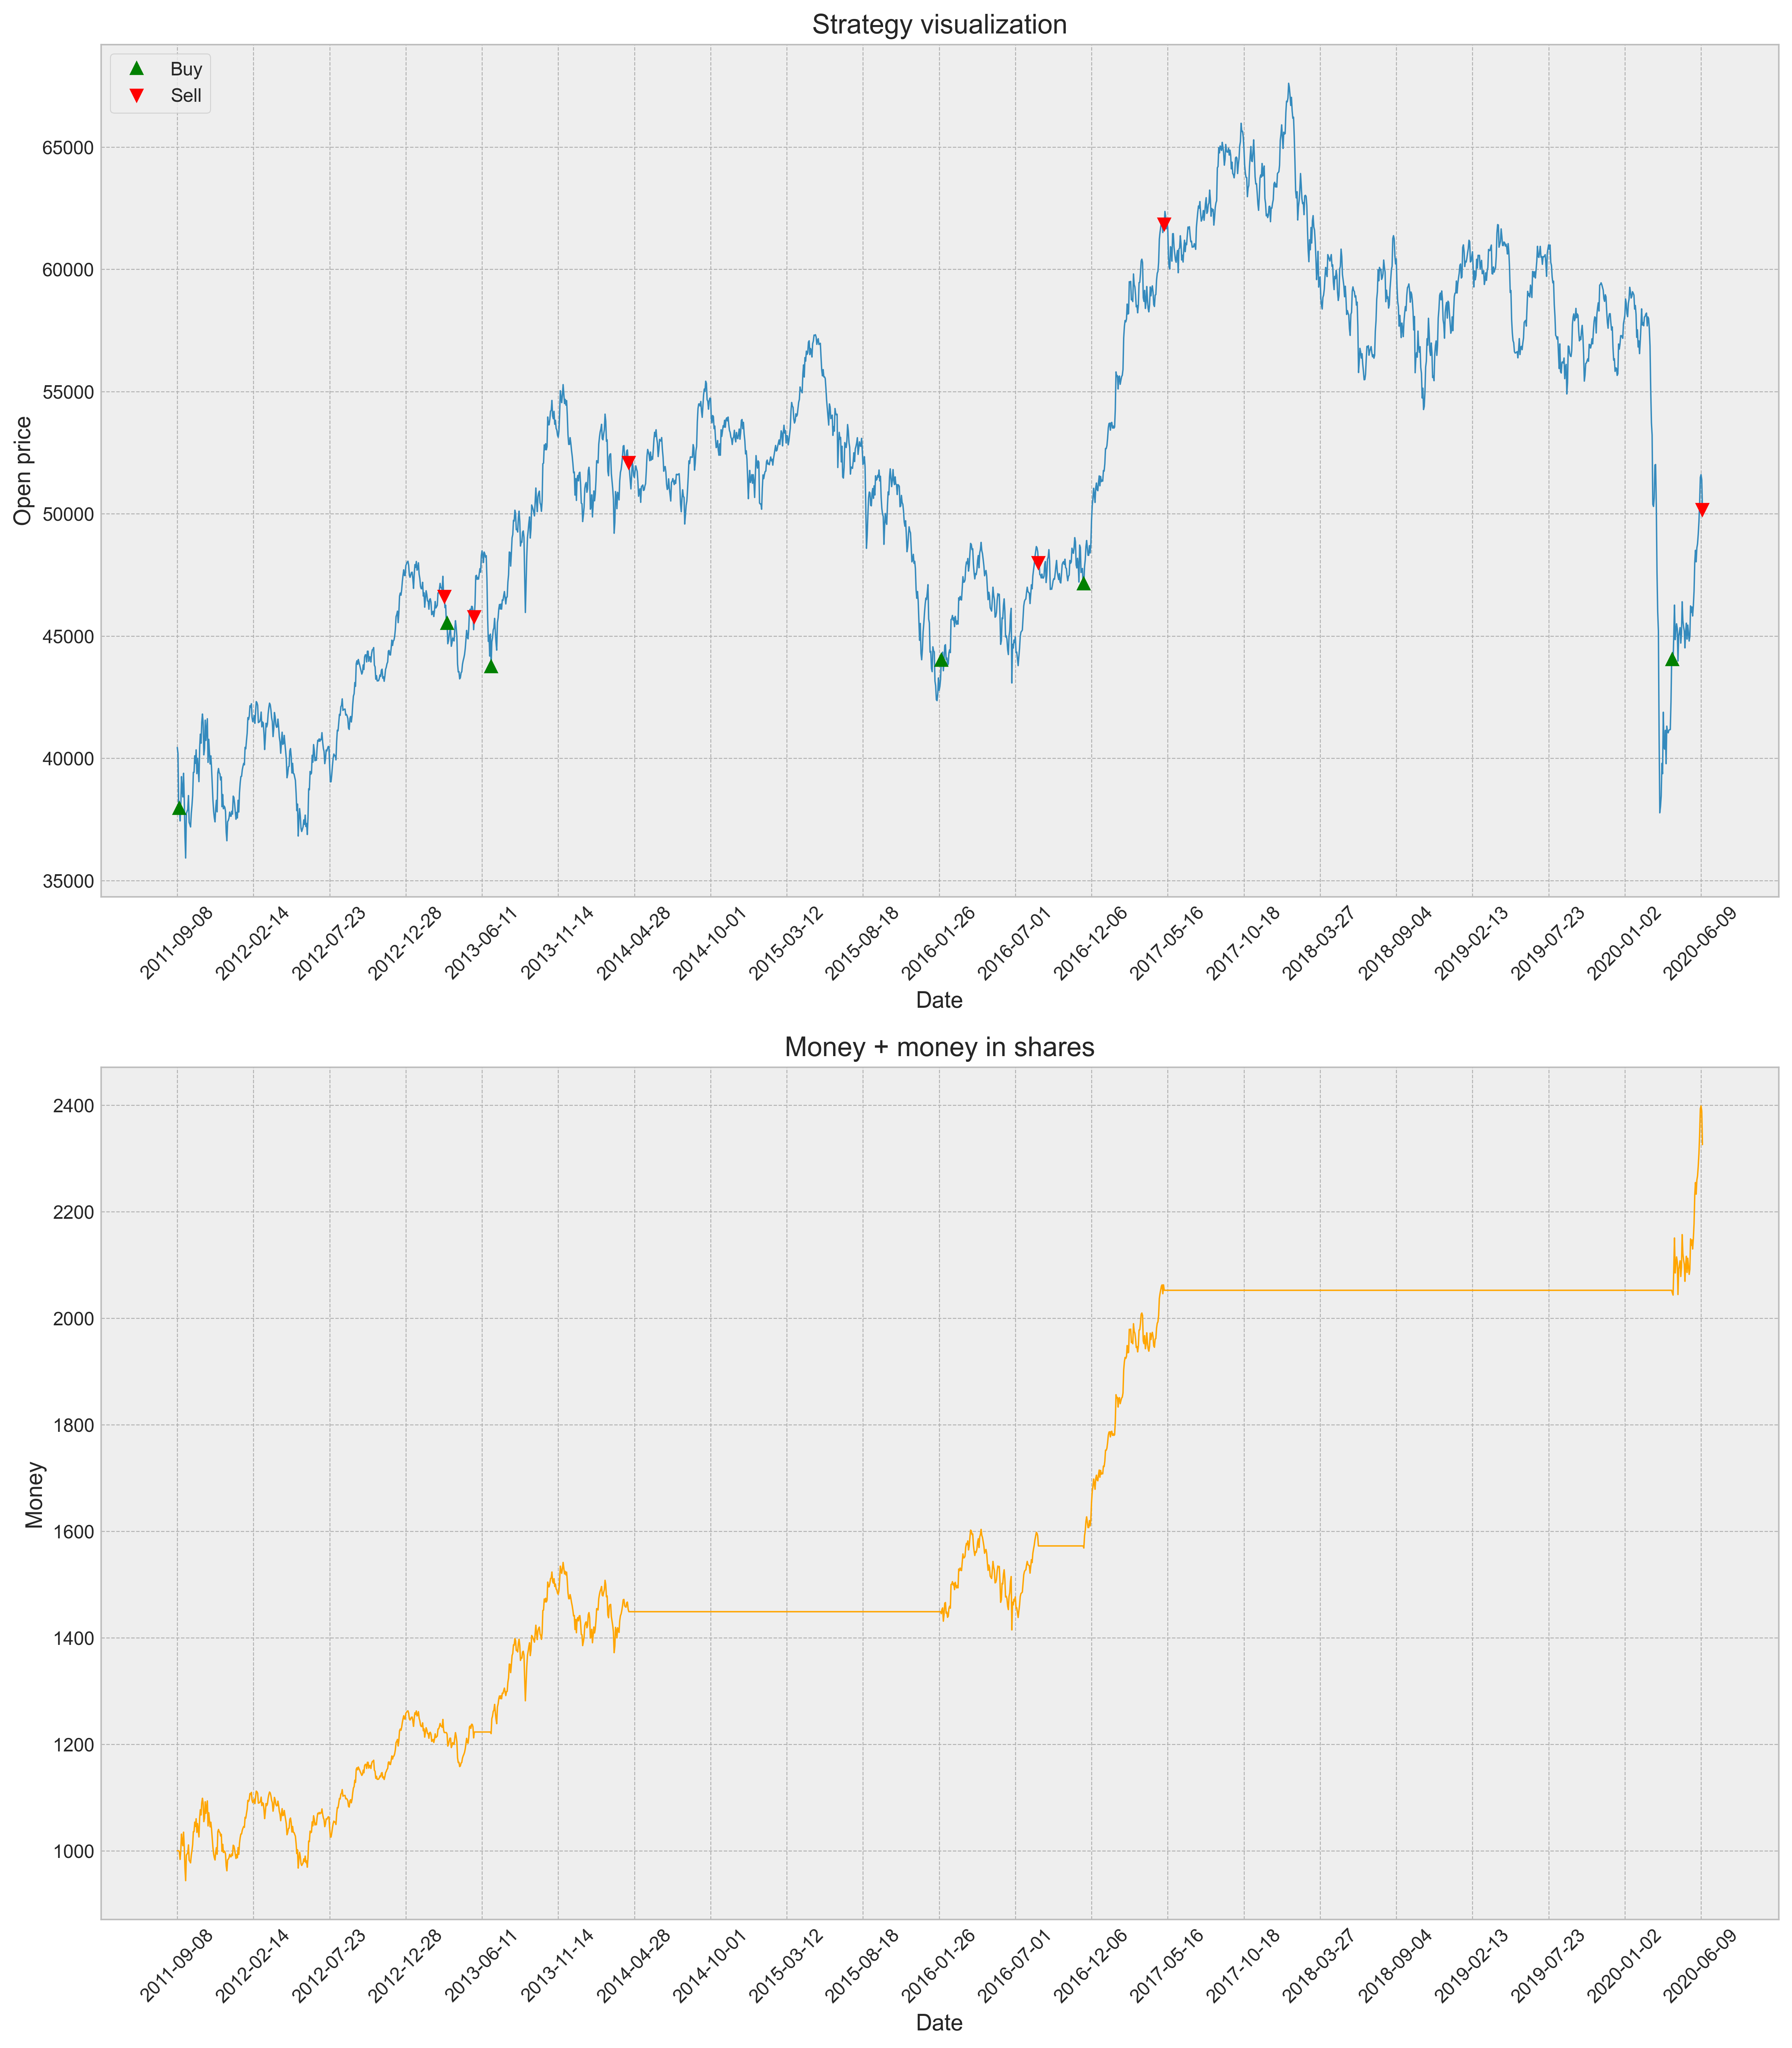

In [8]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_strategy_final_money = sum_money_and_money_in_shares[-1]

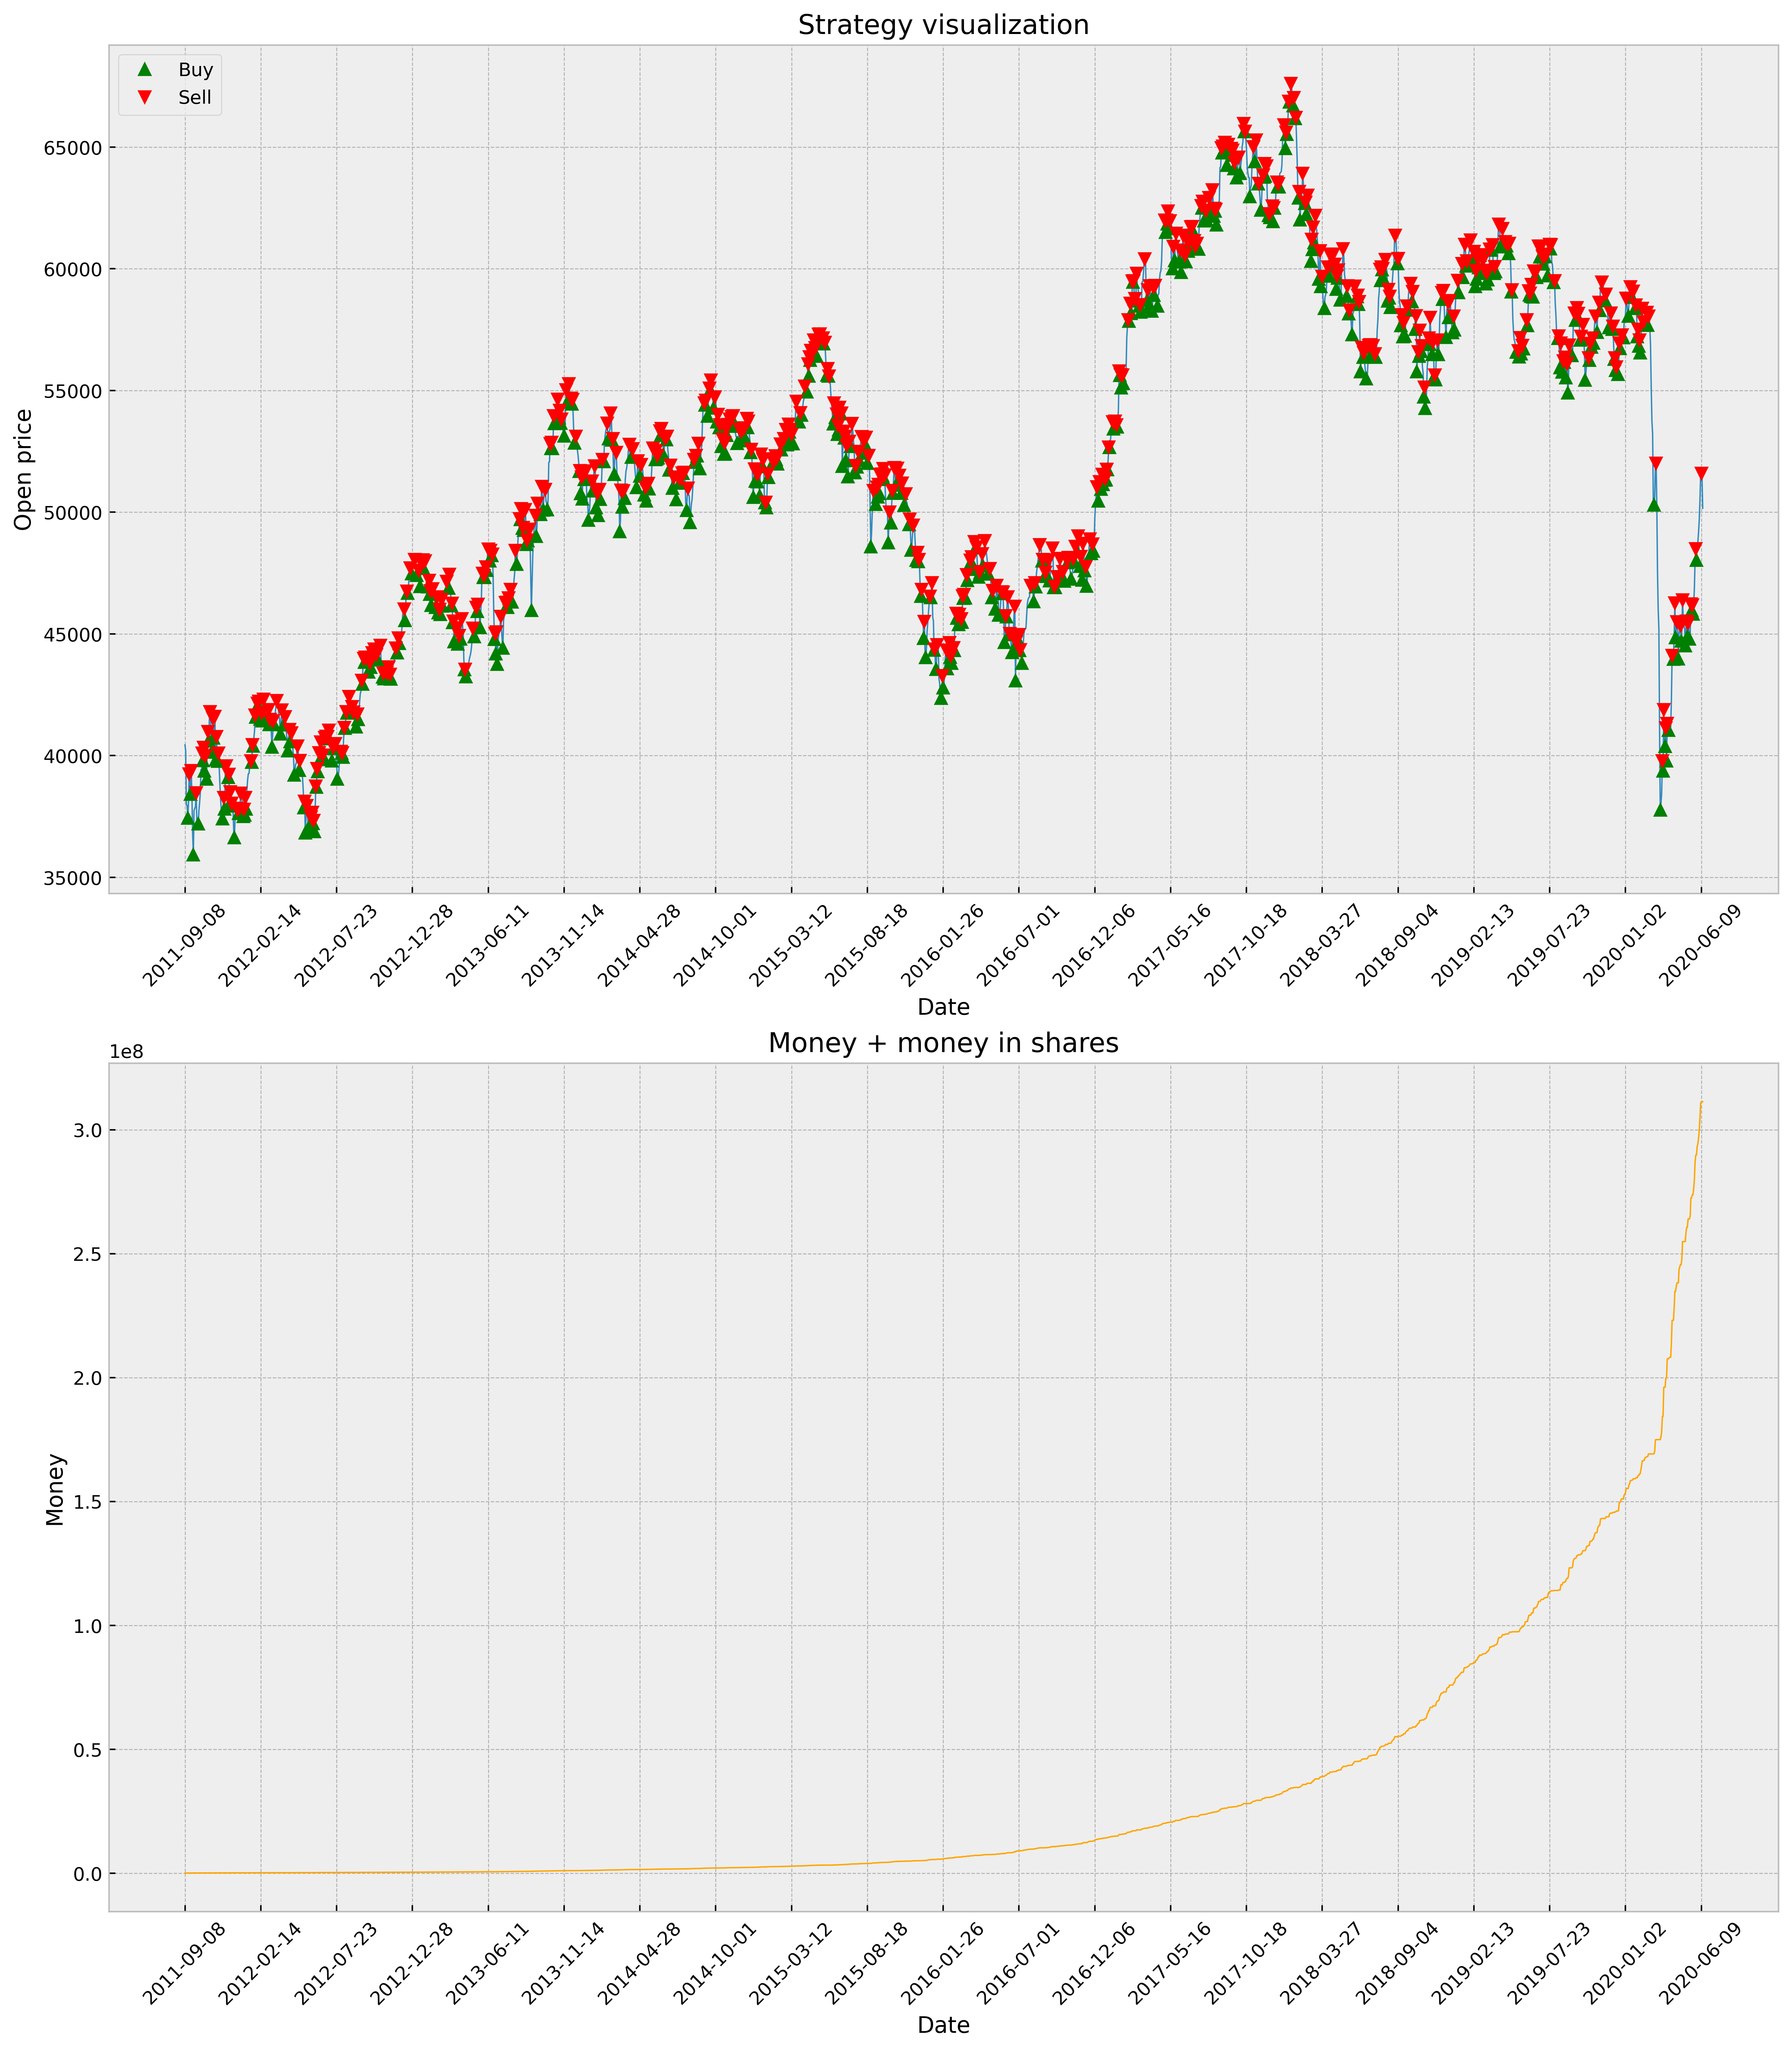

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_best_possible_strategy(
    stock_data
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_possible_strategy_final_money = sum_money_and_money_in_shares[-1]

In [10]:
print(f'{best_strategy_final_money / best_possible_strategy_final_money * 100}%')

0.10910997650039496%
